___
# Ciência dos Dados - PROJETO 1

## Jhonata Ferreira de Souza
___

## Como o nivel de escolaridade dos adultos influencia a taxa de natalidade de sua região?

___
## Introdução

Nesse projeto iremos analisar a relação entre uma pseudo taxa de natalidade a escolaridade predominante em cada região. Por que pseudo taxa de natalidade? Como na PNAD não é informado a taxa de natalidade usaremos uma medida de proporção como nossa taxa. Ao final desse projeto ao terminarmos nossa analise tanto da PNAD de 2011 quanto de 2015 chegaremos a uma conclusão que ou respondera nossa pergunta inicial ou nos apontara que os dados analisados não têm uma relação tão direta entre si


## Hipótese

A hipótese para esse trabalho é que vamos observar que entre os anos conforme o nivel da educação se eleva e as pessoas das diversar regiões começam a ter formações mais elevadas a pseudo taxa de natalidade diminuira, indicando que com a disseminação da educação as pessoas tendem a ter menos filhos

___
## Filtros da base de dados

In [1]:
#Importanto bibliotecas do python a serem usadas
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
#Conferindo o diretório a ser utilizado
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\jhona\Downloads\Ciencia dos Dados DP\Projeto 1


### PNAD 2015

In [3]:
#Importanto a PNAD completa de 2015
data_2015 = pd.read_csv('PES2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')
data_2015.head()

,Unnamed: 0,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
0,0,2015,11,15,1,1,2,27,2,1992,...,1.0,800.0,4.0,5,1.0,2.0,2.0,1.0,800.0,20161117
1,1,2015,11,15,3,1,4,4,5,1992,...,1.0,1150.0,4.0,5,1.0,2.0,2.0,1.0,1150.0,20161117
2,2,2015,11,15,4,1,4,4,1,1980,...,6.0,793.0,4.0,6,1.0,2.0,2.0,1.0,793.0,20161117
3,3,2015,11,15,4,2,2,5,6,1981,...,6.0,793.0,4.0,7,1.0,2.0,2.0,1.0,793.0,20161117
4,4,2015,11,15,4,3,4,8,4,2004,...,6.0,793.0,4.0,2,2.0,NaN,NaN,2.0,793.0,20161117


In [4]:
#Criando uma tabela apenas com os dados de interesse
data2015 = data_2015.loc[:,['UF','V0402','V6007','V0611']]
data2015.head()

,UF,V0402,V6007,V0611
0,11,1,5.0,1.0
1,11,1,5.0,1.0
2,11,1,NaN,NaN
3,11,2,8.0,1.0
4,11,3,NaN,NaN


In [5]:
#Mudando os valores da coluda de estados para o nome dos estados
data2015.UF = data2015.UF.astype('category')
data2015.UF.cat.categories = (['Rondônia','Acre','Amazonas','Roraima','Pará','Amapá','Tocantins','Maranhão','Piauí','Ceará','Rio Grande do Norte','Paraíba','Pernambuco','Alagoas','Sergipe','Bahia','Minas Gerais','Espírito Santo','Rio de Janeiro','São Paulo','Paraná','Santa Catarina','Rio Grande do Sul','Mato Grosso do Sul','Mato Grosso','Goiás','Distrito Federal'])

#Criando uma coluna de Região
data2015.loc[(data2015.UF=='Rondônia') | (data2015.UF=='Acre') | (data2015.UF=='Amazonas') | (data2015.UF=='Roraima') | (data2015.UF=='Pará') | (data2015.UF=='Amapá') | (data2015.UF=='Tocantins'),'Regiao'] = 'Norte'
data2015.loc[(data2015.UF=='Maranhão') | (data2015.UF=='Piaui') | (data2015.UF=='Caerá') | (data2015.UF=='Rio Grande do Norte') | (data2015.UF=='Paraíba') | (data2015.UF=='Pernambuco') | (data2015.UF=='Alagoas') | (data2015.UF=='Sergipe') | (data2015.UF=='Bahia'),'Regiao'] = 'Nordeste'
data2015.loc[(data2015.UF=='Minas Gerais') | (data2015.UF=='Espirito Santo') | (data2015.UF=='Rio de Janeiro') | (data2015.UF=='São Paulo'),'Regiao'] = 'Sudeste'
data2015.loc[(data2015.UF=='Paraná') | (data2015.UF=='Santa Catarina') | (data2015.UF=='Rio Grande do Sul'),'Regiao'] = 'Sul'
data2015.loc[(data2015.UF=='Mato Grosso do Sul') | (data2015.UF=='Mato Grosso') | (data2015.UF=='Goiás') | (data2015.UF=='Distrito Federal'),'Regiao'] = 'Centroeste'
data2015.head()

,UF,V0402,V6007,V0611,Regiao
0,Rondônia,1,5.0,1.0,Norte
1,Rondônia,1,5.0,1.0,Norte
2,Rondônia,1,NaN,NaN,Norte
3,Rondônia,2,8.0,1.0,Norte
4,Rondônia,3,NaN,NaN,Norte


In [6]:
#Mudando os valores da coluda de Condição na família para as suas respectivas condições
data2015.V0402 = data2015.V0402.astype('category')
data2015.V0402.cat.categories = (['Pessoa de referência','Cônjuge','Filho','Outro parente','Agregado','Pensionista','Empregado doméstico','Parente do empregado doméstico'])
data2015.head()

,UF,V0402,V6007,V0611,Regiao
0,Rondônia,Pessoa de referência,5.0,1.0,Norte
1,Rondônia,Pessoa de referência,5.0,1.0,Norte
2,Rondônia,Pessoa de referência,NaN,NaN,Norte
3,Rondônia,Cônjuge,8.0,1.0,Norte
4,Rondônia,Filho,NaN,NaN,Norte


In [7]:
#Subistituindo os NaN da tabela por 0
data2015.V6007.fillna(0, inplace=True)
data2015.V6007 = data2015.V6007.astype('category')
data2015.V0611.fillna(0, inplace=True)
data2015.V0611 = data2015.V0611.astype('category')

In [8]:
#Criando pequenas tabelas separando as pessoeas por região
Norte = data2015.loc[(data2015.Regiao=='Norte')]
Nordeste = data2015.loc[(data2015.Regiao=='Nordeste')]
Sudeste = data2015.loc[(data2015.Regiao=='Sudeste')]
Sul = data2015.loc[(data2015.Regiao=='Sul')]
Centroeste = data2015.loc[(data2015.Regiao=='Centroeste')]

In [9]:
#Criando excel com a nossa tabela filtrada
data2015.to_excel("data2015.xlsx", 'Sheet1')

## Análise

Agora que terminamos as preparações, filtragem ba base de dados e criação de bases de dados auxiliares, iniciaremos nossas análises a partir da premissa de que toda "pessoa de referência", as pessoas "chaves" de cada residencia, são todas pais em potencial então quando criarmos nossa pseudo taxa de natalidade levaremos em consideração a quantidade de filhos assim como a quantidade de "pessoa de referência"

Isso dito começaremos análizando a quantidade de pessoas de referência e filhos e criando a nossa pseudo taxa de natalidade

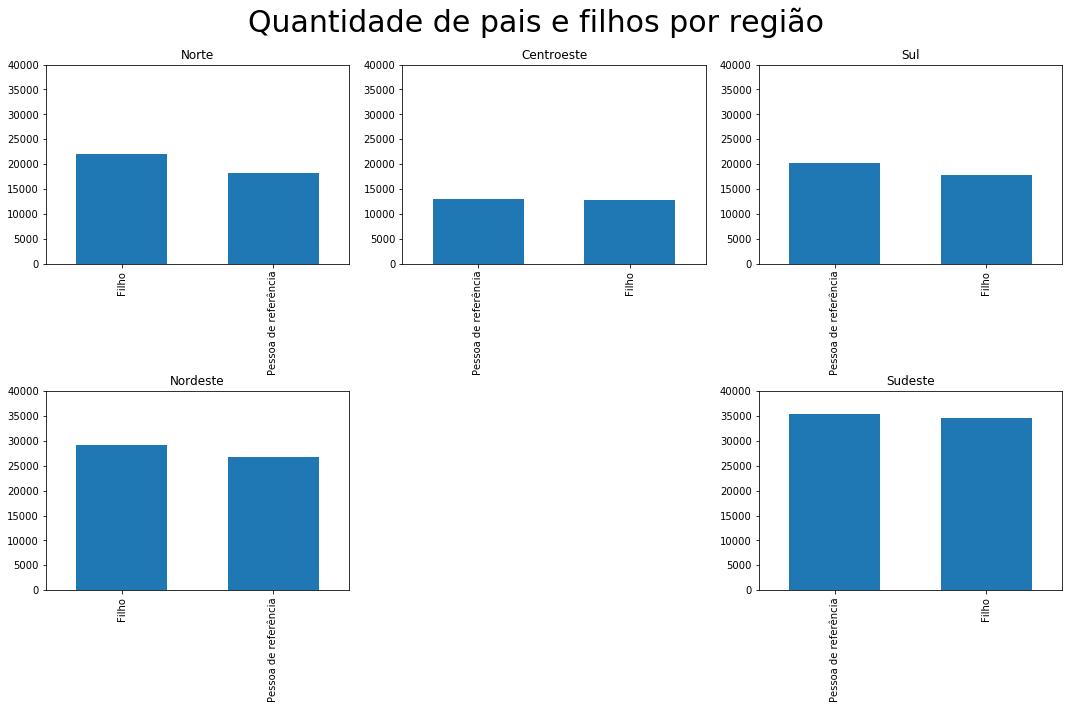

In [10]:
#Plotanto a quantidade de pais e filhos por região utilizando o subplot para que fiquem lado a lado
fig = plt.figure(figsize=(15, 10))

plt.subplot(231)
plot = Norte.V0402.loc[(Norte.V0402 == 'Pessoa de referência')|(Norte.V0402 == 'Filho')].value_counts(False).plot(kind='bar',align='center' ,width=0.6 ,title='Norte')
plt.xlim([-0.5,1.5])
plt.ylim([0,40000])
plt.tight_layout()

plt.subplot(233)
plot = Sul.V0402.loc[(Sul.V0402 == 'Pessoa de referência')|(Sul.V0402 == 'Filho')].value_counts(False).plot(kind='bar',align='center',width=0.6,title='Sul')
plt.xlim([-0.5,1.5])
plt.ylim([0,40000])
plt.tight_layout()

plt.subplot(236)
plot = Sudeste.V0402.loc[(Sudeste.V0402 == 'Pessoa de referência')|(Sudeste.V0402 == 'Filho')].value_counts(False).plot(kind='bar',align='center',width=0.6,title='Sudeste')
plt.xlim([-0.5,1.5])
plt.ylim([0,40000])
plt.tight_layout()

plt.subplot(234)
plot = Nordeste.V0402.loc[(Nordeste.V0402 == 'Pessoa de referência')|(Nordeste.V0402 == 'Filho')].value_counts(False).plot(kind='bar',align='center',width=0.6 ,title='Nordeste')
plt.xlim([-0.5,1.5])
plt.ylim([0,40000])
plt.tight_layout()

plt.subplot(232)
plot = Centroeste.V0402.loc[(Centroeste.V0402 == 'Pessoa de referência')|(Centroeste.V0402 == 'Filho')].value_counts(False).plot(kind='bar',align='center',width=0.6, title='Centroeste')
plt.xlim([-0.5,1.5])
plt.ylim([0,40000])
plt.tight_layout()

plt.suptitle('Quantidade de pais e filhos por região', fontsize=30)
plt.subplots_adjust(top=0.9)

plt.show()

Os graficos acima estão plotados de forma que a condição da familia, pessoa de referência ou filho, predominante naquela região fique a esquerda então já podemos perceber que no norte e nordeste a quantidade de filhos é maior do que a quantidade de pessoas de refêrencia diferentemente das outras 3 regiões onde a predominancia é da condição de pessoa de referência.

Nossa pseudo taxa de natalidade sera feita da seguinte forma: numero de filhos dividido pelo numero de pessoas de referência

In [11]:
#Fazendo a conta das pseudo taxas de natalidade para todas as regiões

Norte_num = Norte.V0402.loc[(Norte.V0402 == 'Pessoa de referência')|(Norte.V0402 == 'Filho')].describe()
PTaxaN = Norte_num[3]/(Norte_num[0]-Norte_num[3])

Nordeste_num = Nordeste.V0402.loc[(Nordeste.V0402 == 'Pessoa de referência')|(Nordeste.V0402 == 'Filho')].describe()
PTaxaND = Nordeste_num[3]/(Nordeste_num[0]-Nordeste_num[3])

Centroeste_num = Centroeste.V0402.loc[(Centroeste.V0402 == 'Pessoa de referência')|(Centroeste.V0402 == 'Filho')].describe()
PTaxaC = (Centroeste_num[0]-Centroeste_num[3])/Centroeste_num[3]

Sul_num = Sul.V0402.loc[(Sul.V0402 == 'Pessoa de referência')|(Sul.V0402 == 'Filho')].describe()
PTaxaS = (Sul_num[0]-Sul_num[3])/Sul_num[3]

Sudeste_num = Sudeste.V0402.loc[(Sudeste.V0402 == 'Pessoa de referência')|(Sudeste.V0402 == 'Filho')].describe()
PTaxaSD = (Sudeste_num[0]-Sudeste_num[3])/Sudeste_num[3]


print ('Pseudo taxa de natalidade da região Norte :',PTaxaN)
print ('Pseudo taxa de natalidade da região Nordeste :',PTaxaND)
print ('Pseudo taxa de natalidade da região Centroeste :',PTaxaC)
print ('Pseudo taxa de natalidade da região Sul :',PTaxaS)
print ('Pseudo taxa de natalidade da região Sudeste :',PTaxaSD)


Pseudo taxa de natalidade da região Norte : 1.21761172646
Pseudo taxa de natalidade da região Nordeste : 1.08741519421
Pseudo taxa de natalidade da região Centroeste : 0.985543827444
Pseudo taxa de natalidade da região Sul : 0.886077205518
Pseudo taxa de natalidade da região Sudeste : 0.978814157792


Nosso próximo passo é análisarmos a escolaridade das pessoas de referência, mas para termos dados mais direcionados iremos levar em conta para a analise de escolaridade apenas aqueles que já terminaram seus estudos

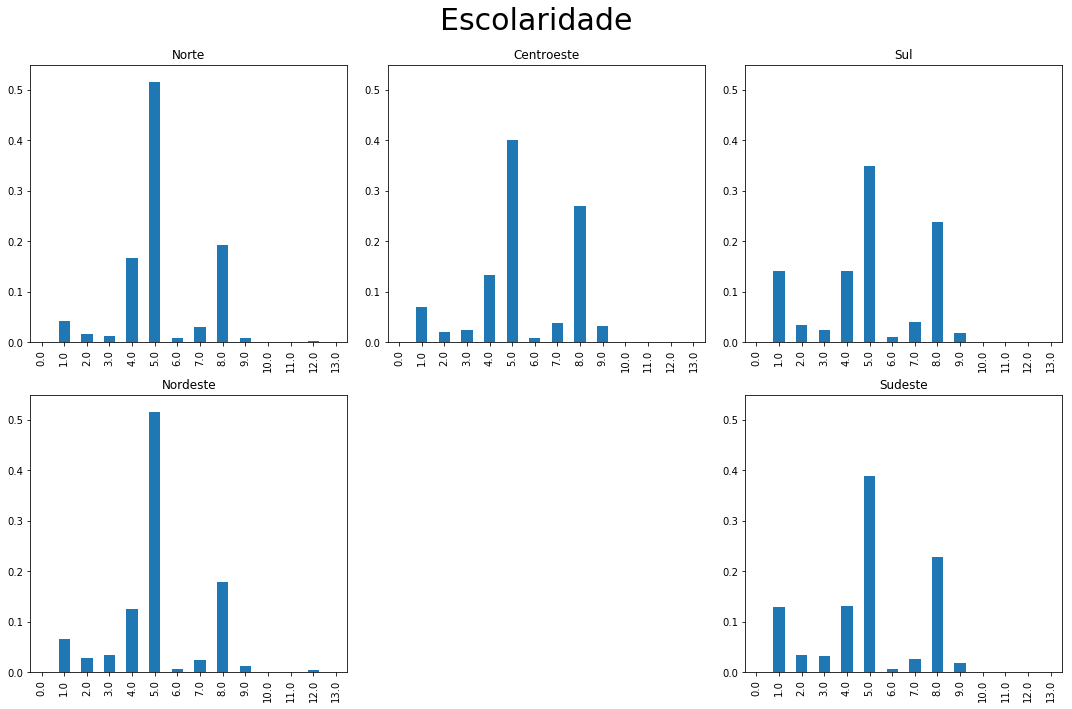

In [12]:
#Plotagem do grafico de escolaridade, curso mais elevado e que foi concluido 

fig = plt.figure(figsize=(15, 10))
plt.subplot(231)
Norte.V6007.loc[(Norte.V0611 == 1) & (Norte.V0402 == 'Pessoa de referência')].value_counts(True, sort = False).plot(kind='bar', title='Norte')
plt.tight_layout()
plt.ylim(0,0.55)

plt.subplot(234)
Nordeste.V6007.loc[(Nordeste.V0611 == 1) & (Nordeste.V0402 == 'Pessoa de referência')].value_counts(True, sort = False).plot(kind='bar', title='Nordeste')
plt.tight_layout()
plt.ylim(0,0.55)

plt.subplot(232)
Centroeste.V6007.loc[(Centroeste.V0611 == 1) & (Centroeste.V0402 == 'Pessoa de referência')].value_counts(True, sort = False).plot(kind='bar', title='Centroeste')
plt.tight_layout()
plt.ylim(0,0.55)

plt.subplot(233)
Sul.V6007.loc[(Sul.V0611 == 1) & (Sul.V0402 == 'Pessoa de referência')].value_counts(True, sort = False).plot(kind='bar', title='Sul')
plt.tight_layout()
plt.ylim(0,0.55)

plt.subplot(236)
Sudeste.V6007.loc[(Sudeste.V0611 == 1) & (Sudeste.V0402 == 'Pessoa de referência')].value_counts(True, sort = False).plot(kind='bar', title='Sudeste')
plt.tight_layout()
plt.ylim(0,0.55)

plt.suptitle('Escolaridade', fontsize=30)
plt.subplots_adjust(top=0.9)
plt.show()

#### Com a ajuda desses graficos e com o dicionario da PNAD, não iremos trocar os valores númericos pelos nomes equivalentes por questão de layout pois ficariam nomes muito grande o que acabariam poluindo o plotamento dos gáficos, podemos chegar as seguintes conclusões por Região:

##### Norte: 
O curso mais concluido foi o ensino médio(5) com uma porcentagem por volta de 52% e o segundo mais concluido é a graduação(8) com porcentagem por volta de 20%.

##### Nordeste:
O curos mais concluido foi o ensino médio(5) com uma porcentagem por volta de 51% e o segundo mais concluido é a graduação(8) com porcentagem por volta de 18%.

##### Centroeste
O curso mais concluido foi o ensino médio(5) com uma porcentagem por volta de 40% e o segundo mais concluido é a graduação(8) com porcentagem por volta de 28%.

##### Sul
O curso mais concluido foi o ensino médio(5) com uma porcentagem por volta de 35% e o segundo mais concluido é a graduação(8) com porcentagem por volta de 24%.

##### Sudeste
O curso mais concluido foi o ensino médio(5) com uma porcentagem por volta de 39% e o segundo mais concluido é a graduação(8) com porcentagem por volta de 24%.



Com isso podemos perceber que a base de escolaridade tem suas semelhanças, o indice mais alto é o de conclusão do ensino médio e o segundo é o de conclusão da graduação. Mas vamos focar na diferença que esses dois dados nos indicam, mesmo o primeiro e segundo indice sendo os mesmo a porcentagem de diferenã entre eles varia, entre os estados e é isso que iremos levar e consideração:

#### Diferença entre as porcentagens:

    Norte: 32% de diferença
    
    Nordeste: 33% de diferença
    
    Centroeste: 10% de diferença
    
    Sul: 11% de diferença
    
    Sudeste: 15% de diferença

In [13]:
print ('Cruzando nossas duas analises:\n\nNorte:\n    Porcentagem da diferença: 32% \n    Pseudo taxa de natalidade:', PTaxaN.round(2), '\n\nNordeste:\n    Porcentagem da diferença: 33% \n    Pseudo taxa de natalidade:', PTaxaND.round(2), '\n\nCentroeste:\n    Porcentagem da diferença: 10% \n    Pseudo taxa de natalidade:',PTaxaC.round(2),'\n\nSul:\n    Porcentagem da diferença: 11%\n    Pseudo taxa de natalidade:',PTaxaS.round(2), '\n\nSudeste:\n    Porcentagem da diferença: 15%\n    Pseudo taxa de natalidade:',PTaxaSD.round(2))

Cruzando nossas duas analises:

Norte:
    Porcentagem da diferença: 32% 
    Pseudo taxa de natalidade: 1.22 

Nordeste:
    Porcentagem da diferença: 33% 
    Pseudo taxa de natalidade: 1.09 

Centroeste:
    Porcentagem da diferença: 10% 
    Pseudo taxa de natalidade: 0.99 

Sul:
    Porcentagem da diferença: 11%
    Pseudo taxa de natalidade: 0.89 

Sudeste:
    Porcentagem da diferença: 15%
    Pseudo taxa de natalidade: 0.98


Conclusão intermediaria: Nas regiões norte e nordeste onde a porcentagem da diferença é maior que 30% a nossa pseudo taxa esta acima de 1 e nas outras três regiões onde a diferença esta entre 10% e 15% a pseudo taxa esta abaixo de 1

Mas ainda não podemos afirmar que essa ligação é realmente tão direta quanto parece, para tornar nossa análise mais precisa faremos essa mesma análise na PNAD de 2011 e então compararemos as diferenças e semelhanças nos dados entre as duas PNADs

### PNAD 2011

In [14]:
#Importanto a PNAD completa de 2011
data_2011 = pd.read_csv('PES2011csv.zip', compression='zip', header=0, sep=',', quotechar='"')
data_2011.head()

,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,V8005,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
0,2011,11,11000000.0,1,1,2,25,12,1961,49,...,4.0,1.000000e+12,99.0,2,1.0,2.0,2.0,1.0,1.000000e+12,20100000.0
1,2011,11,11000000.0,1,2,4,1,4,1978,33,...,4.0,1.000000e+12,99.0,6,2.0,NaN,NaN,2.0,1.000000e+12,20100000.0
2,2011,11,11000000.0,1,3,4,15,6,1996,15,...,4.0,1.000000e+12,99.0,3,2.0,NaN,NaN,2.0,1.000000e+12,20100000.0
3,2011,11,11000000.0,1,4,2,3,12,2001,9,...,4.0,1.000000e+12,99.0,2,2.0,NaN,NaN,2.0,1.000000e+12,20100000.0
4,2011,11,11000000.0,2,1,4,16,10,1959,51,...,4.0,1.461000e+03,5.0,4,1.0,2.0,2.0,1.0,1.461000e+03,20100000.0


In [15]:
#Criando uma tabela apenas com os dados de interesse
data2011 = data_2011.loc[:,['UF','V0402','V6007','V0611']]
data2011.head()

,UF,V0402,V6007,V0611
0,11,1,1.0,3.0
1,11,2,NaN,NaN
2,11,3,NaN,NaN
3,11,3,NaN,NaN
4,11,1,5.0,3.0


In [16]:
#Mudando os valores da coluda de estados para o nome dos estados
data2011.UF = data2011.UF.astype('category')
data2011.UF.cat.categories = (['Rondônia','Acre','Amazonas','Roraima','Pará','Amapá','Tocantins','Maranhão','Piauí','Ceará','Rio Grande do Norte','Paraíba','Pernambuco','Alagoas','Sergipe','Bahia','Minas Gerais','Espírito Santo','Rio de Janeiro','São Paulo','Paraná','Santa Catarina','Rio Grande do Sul','Mato Grosso do Sul','Mato Grosso','Goiás','Distrito Federal'])

#Criando uma coluna de Região
data2011.loc[(data2011.UF=='Rondônia') | (data2011.UF=='Acre') | (data2011.UF=='Amazonas') | (data2011.UF=='Roraima') | (data2011.UF=='Pará') | (data2011.UF=='Amapá') | (data2011.UF=='Tocantins'),'Regiao'] = 'Norte'
data2011.loc[(data2011.UF=='Maranhão') | (data2011.UF=='Piaui') | (data2011.UF=='Caerá') | (data2011.UF=='Rio Grande do Norte') | (data2011.UF=='Paraíba') | (data2011.UF=='Pernambuco') | (data2011.UF=='Alagoas') | (data2011.UF=='Sergipe') | (data2011.UF=='Bahia'),'Regiao'] = 'Nordeste'
data2011.loc[(data2011.UF=='Minas Gerais') | (data2011.UF=='Espirito Santo') | (data2011.UF=='Rio de Janeiro') | (data2011.UF=='São Paulo'),'Regiao'] = 'Sudeste'
data2011.loc[(data2011.UF=='Paraná') | (data2011.UF=='Santa Catarina') | (data2011.UF=='Rio Grande do Sul'),'Regiao'] = 'Sul'
data2011.loc[(data2011.UF=='Mato Grosso do Sul') | (data2011.UF=='Mato Grosso') | (data2011.UF=='Goiás') | (data2011.UF=='Distrito Federal'),'Regiao'] = 'Centroeste'
data2011.head()

,UF,V0402,V6007,V0611,Regiao
0,Rondônia,1,1.0,3.0,Norte
1,Rondônia,2,NaN,NaN,Norte
2,Rondônia,3,NaN,NaN,Norte
3,Rondônia,3,NaN,NaN,Norte
4,Rondônia,1,5.0,3.0,Norte


In [17]:
#Mudando os valores da coluda de Condição na família para as suas respectivas condições
data2011.V0402 = data2011.V0402.astype('category')
data2011.V0402.cat.categories = (['Pessoa de referência','Cônjuge','Filho','Outro parente','Agregado','Pensionista','Empregado doméstico','Parente do empregado doméstico'])
data2011.head()

,UF,V0402,V6007,V0611,Regiao
0,Rondônia,Pessoa de referência,1.0,3.0,Norte
1,Rondônia,Cônjuge,NaN,NaN,Norte
2,Rondônia,Filho,NaN,NaN,Norte
3,Rondônia,Filho,NaN,NaN,Norte
4,Rondônia,Pessoa de referência,5.0,3.0,Norte


In [18]:
#Subistituindo os NaN da tabela por 0
data2011.V6007.fillna(0, inplace=True)
data2011.V6007 = data2011.V6007.astype('category')
data2011.V0611.fillna(0, inplace=True)
data2011.V0611 = data2011.V0611.astype('category')

In [19]:
#Criando pequenas tabelas separando as pessoeas por região
Norte11 = data2011.loc[(data2011.Regiao=='Norte')]
Nordeste11 = data2011.loc[(data2011.Regiao=='Nordeste')]
Sudeste11 = data2011.loc[(data2011.Regiao=='Sudeste')]
Sul11 = data2011.loc[(data2011.Regiao=='Sul')]
Centroeste11 = data2011.loc[(data2011.Regiao=='Centroeste')]

In [20]:
#Criando excel com a nossa tabela filtrada
data2011.to_excel("data2011.xlsx", 'Sheet1')

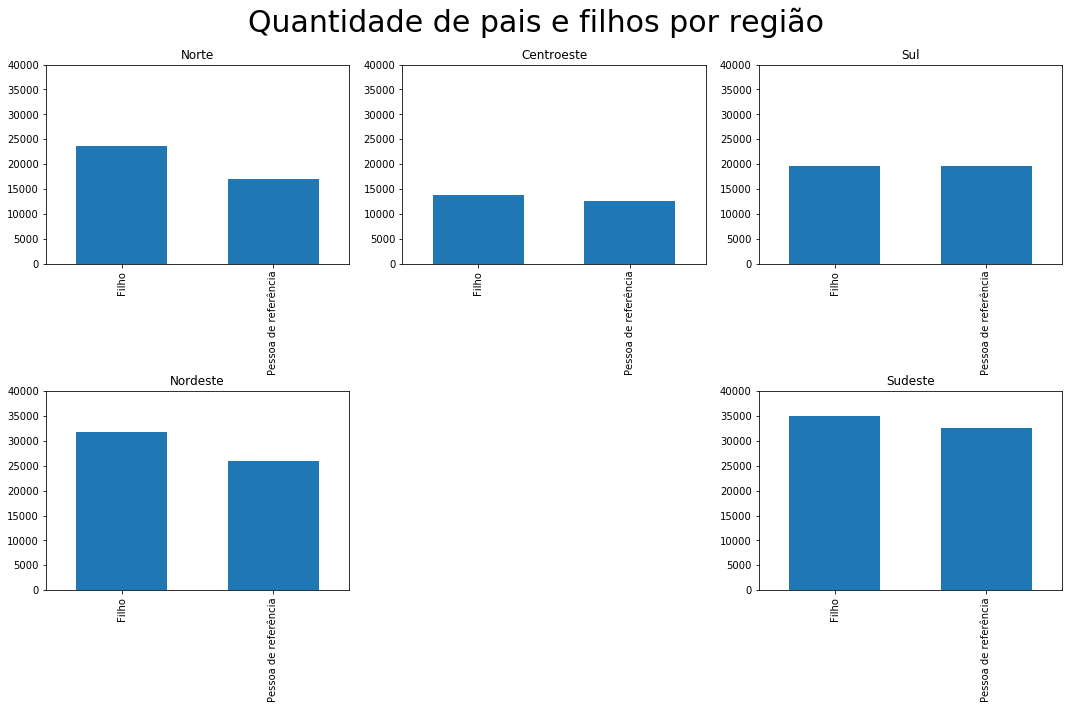

In [21]:
#Plotanto a quantidade de pais e filhos por região utilizando o subplot para que fiquem lado a lado
fig = plt.figure(figsize=(15, 10))

plt.subplot(231)
plot = Norte11.V0402.loc[(Norte11.V0402 == 'Pessoa de referência')|(Norte11.V0402 == 'Filho')].value_counts(False).plot(kind='bar',align='center' ,width=0.6 ,title='Norte')
plt.xlim([-0.5,1.5])
plt.ylim([0,40000])
plt.tight_layout()

plt.subplot(233)
plot = Sul11.V0402.loc[(Sul11.V0402 == 'Pessoa de referência')|(Sul11.V0402 == 'Filho')].value_counts(False).plot(kind='bar',align='center',width=0.6,title='Sul')
plt.xlim([-0.5,1.5])
plt.ylim([0,40000])
plt.tight_layout()

plt.subplot(236)
plot = Sudeste11.V0402.loc[(Sudeste11.V0402 == 'Pessoa de referência')|(Sudeste11.V0402 == 'Filho')].value_counts(False).plot(kind='bar',align='center',width=0.6,title='Sudeste')
plt.xlim([-0.5,1.5])
plt.ylim([0,40000])
plt.tight_layout()

plt.subplot(234)
plot = Nordeste11.V0402.loc[(Nordeste11.V0402 == 'Pessoa de referência')|(Nordeste11.V0402 == 'Filho')].value_counts(False).plot(kind='bar',align='center',width=0.6 ,title='Nordeste')
plt.xlim([-0.5,1.5])
plt.ylim([0,40000])
plt.tight_layout()

plt.subplot(232)
plot = Centroeste11.V0402.loc[(Centroeste11.V0402 == 'Pessoa de referência')|(Centroeste11.V0402 == 'Filho')].value_counts(False).plot(kind='bar',align='center',width=0.6, title='Centroeste')
plt.xlim([-0.5,1.5])
plt.ylim([0,40000])
plt.tight_layout()

plt.suptitle('Quantidade de pais e filhos por região', fontsize=30)
plt.subplots_adjust(top=0.9)

plt.show()

In [22]:
#Fazendo a conta das pseudo taxas de natalidade para todas as regiões

Norte11_num = Norte11.V0402.loc[(Norte11.V0402 == 'Pessoa de referência')|(Norte11.V0402 == 'Filho')].describe()
PTaxaN11 = Norte11_num[3]/(Norte11_num[0]-Norte11_num[3])

Nordeste11_num = Nordeste11.V0402.loc[(Nordeste11.V0402 == 'Pessoa de referência')|(Nordeste11.V0402 == 'Filho')].describe()
PTaxaND11 = Nordeste11_num[3]/(Nordeste11_num[0]-Nordeste11_num[3])

Centroeste11_num = Centroeste11.V0402.loc[(Centroeste11.V0402 == 'Pessoa de referência')|(Centroeste11.V0402 == 'Filho')].describe()
PTaxaC11 = Centroeste11_num[3]/(Centroeste11_num[0]-Centroeste11_num[3])

Sul11_num = Sul11.V0402.loc[(Sul11.V0402 == 'Pessoa de referência')|(Sul11.V0402 == 'Filho')].describe()
PTaxaS11 = Sul11_num[3]/(Sul11_num[0]-Sul11_num[3])

Sudeste11_num = Sudeste11.V0402.loc[(Sudeste11.V0402 == 'Pessoa de referência')|(Sudeste11.V0402 == 'Filho')].describe()
PTaxaSD11 = Sudeste11_num[3]/(Sudeste11_num[0]-Sudeste11_num[3])


print ('Pseudo taxa de natalidade da região Norte :',PTaxaN11)
print ('Pseudo taxa de natalidade da região Nordeste :',PTaxaND11)
print ('Pseudo taxa de natalidade da região Centroeste :',PTaxaC11)
print ('Pseudo taxa de natalidade da região Sul :',PTaxaS11)
print ('Pseudo taxa de natalidade da região Sudeste :',PTaxaSD11)

Pseudo taxa de natalidade da região Norte : 1.39277957147
Pseudo taxa de natalidade da região Nordeste : 1.22826296511
Pseudo taxa de natalidade da região Centroeste : 1.09244227283
Pseudo taxa de natalidade da região Sul : 1.00178443969
Pseudo taxa de natalidade da região Sudeste : 1.0771148106


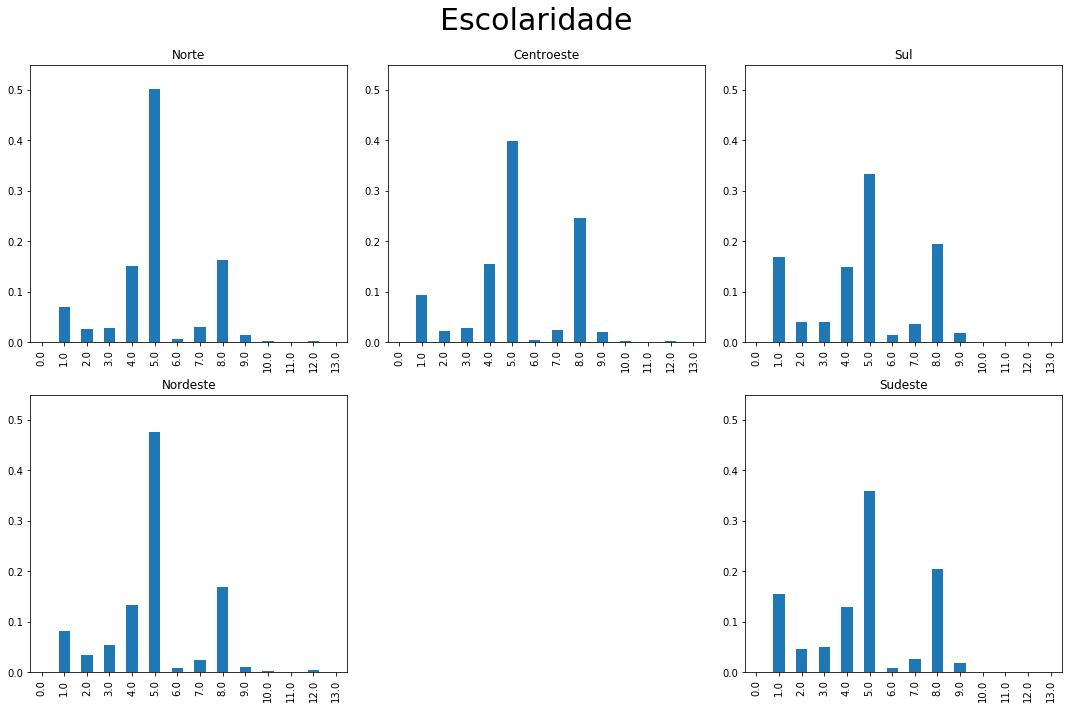

In [23]:
#Plotagem do grafico de escolaridade, curso mais elevado e que foi concluido 

fig = plt.figure(figsize=(15, 10))
plt.subplot(231)
Norte11.V6007.loc[(Norte11.V0611 == 1) & (Norte11.V0402 == 'Pessoa de referência')].value_counts(True, sort = False).plot(kind='bar', title='Norte')
plt.tight_layout()
plt.ylim(0,0.55)

plt.subplot(234)
Nordeste11.V6007.loc[(Nordeste11.V0611 == 1) & (Nordeste11.V0402 == 'Pessoa de referência')].value_counts(True, sort = False).plot(kind='bar', title='Nordeste')
plt.tight_layout()
plt.ylim(0,0.55)

plt.subplot(232)
Centroeste11.V6007.loc[(Centroeste11.V0611 == 1) & (Centroeste11.V0402 == 'Pessoa de referência')].value_counts(True, sort = False).plot(kind='bar', title='Centroeste')
plt.tight_layout()
plt.ylim(0,0.55)

plt.subplot(233)
Sul11.V6007.loc[(Sul11.V0611 == 1) & (Sul11.V0402 == 'Pessoa de referência')].value_counts(True, sort = False).plot(kind='bar', title='Sul')
plt.tight_layout()
plt.ylim(0,0.55)

plt.subplot(236)
Sudeste11.V6007.loc[(Sudeste11.V0611 == 1) & (Sudeste11.V0402 == 'Pessoa de referência')].value_counts(True, sort = False).plot(kind='bar', title='Sudeste')
plt.tight_layout()
plt.ylim(0,0.55)

plt.suptitle('Escolaridade', fontsize=30)
plt.subplots_adjust(top=0.9)
plt.show()

##### Norte: 
O curso mais concluido foi o ensino médio(5) com uma porcentagem por volta de 50% e o segundo mais concluido é a graduação(8) com porcentagem por volta de 18%.

##### Nordeste:
O curos mais concluido foi o ensino médio(5) com uma porcentagem por volta de 48% e o segundo mais concluido é a graduação(8) com porcentagem por volta de 18%.

##### Centroeste
O curso mais concluido foi o ensino médio(5) com uma porcentagem por volta de 40% e o segundo mais concluido é a graduação(8) com porcentagem por volta de 24%.

##### Sul
O curso mais concluido foi o ensino médio(5) com uma porcentagem por volta de 34% e o segundo mais concluido é a graduação(8) com porcentagem por volta de 20%.

##### Sudeste
O curso mais concluido foi o ensino médio(5) com uma porcentagem por volta de 38% e o segundo mais concluido é a graduação(8) com porcentagem por volta de 21%.



#### Diferença entre as porcentagens:

    Norte: 32% de diferença
    
    Nordeste: 30% de diferença
    
    Centroeste: 16% de diferença
    
    Sul: 14% de diferença
    
    Sudeste: 17% de diferença

In [24]:
print ('Cruzando nossas duas analises:\n\nNorte:\n    Porcentagem da diferença: 32% \n    Pseudo taxa de natalidade:', PTaxaN11.round(2), '\n\nNordeste:\n    Porcentagem da diferença: 30% \n    Pseudo taxa de natalidade:', PTaxaND11.round(2), '\n\nCentroeste:\n    Porcentagem da diferença: 16% \n    Pseudo taxa de natalidade:',PTaxaC11.round(2),'\n\nSul:\n    Porcentagem da diferença: 14%\n    Pseudo taxa de natalidade:',PTaxaS11.round(2), '\n\nSudeste:\n    Porcentagem da diferença: 17%\n    Pseudo taxa de natalidade:',PTaxaSD11.round(2))

Cruzando nossas duas analises:

Norte:
    Porcentagem da diferença: 32% 
    Pseudo taxa de natalidade: 1.39 

Nordeste:
    Porcentagem da diferença: 30% 
    Pseudo taxa de natalidade: 1.23 

Centroeste:
    Porcentagem da diferença: 16% 
    Pseudo taxa de natalidade: 1.09 

Sul:
    Porcentagem da diferença: 14%
    Pseudo taxa de natalidade: 1.0 

Sudeste:
    Porcentagem da diferença: 17%
    Pseudo taxa de natalidade: 1.08


Conclusão intermediaria: Nas regiões norte e nordeste onde a porcentagem da diferença é maior que 30% a nossa pseudo taxa esta acima de 1.2 e nas outras três regiões onde a diferença esta entre 14% e 17% a pseudo taxa esta abaixo de 1.1

___
## Resultados



Agora que temos as conclusões intermediarias sobre as duas PNADs vamos analisar as duas ao mesmo tempo e tirar nossas conclusões sobre esse projeto

In [25]:
print ('Norte:\n\n    2011:\n        Porcentagem da diferença: 32%\n        Pseudo taxa de natalidade:', PTaxaN11.round(2), '\n\n    2015:\n        Porcentagem da diferença: 32%\n        Pseudo taxa de natalidade:', PTaxaN.round(2),'\n')
print ('Nordeste:\n\n    2011:\n        Porcentagem da diferença: 30%\n        Pseudo taxa de natalidade:', PTaxaND11.round(2), '\n\n    2015:\n        Porcentagem da diferença: 33%\n        Pseudo taxa de natalidade:', PTaxaND.round(2),'\n')
print ('Centroeste:\n\n    2011:\n        Porcentagem da diferença: 16%\n        Pseudo taxa de natalidade:', PTaxaC11.round(2), '\n\n    2015:\n        Porcentagem da diferença: 10%\n        Pseudo taxa de natalidade:', PTaxaC.round(2),'\n')
print ('Sul:\n\n    2011:\n        Porcentagem da diferença: 14%\n        Pseudo taxa de natalidade:', PTaxaS11.round(2), '\n\n    2015:\n        Porcentagem da diferença: 11%\n        Pseudo taxa de natalidade:', PTaxaS.round(2),'\n')
print ('Sudeste:\n\n    2011:\n        Porcentagem da diferença: 17%\n        Pseudo taxa de natalidade:', PTaxaSD11.round(2), '\n\n    2015:\n        Porcentagem da diferença: 15%\n        Pseudo taxa de natalidade:', PTaxaSD.round(2),)

Norte:

    2011:
        Porcentagem da diferença: 32%
        Pseudo taxa de natalidade: 1.39 

    2015:
        Porcentagem da diferença: 32%
        Pseudo taxa de natalidade: 1.22 

Nordeste:

    2011:
        Porcentagem da diferença: 30%
        Pseudo taxa de natalidade: 1.23 

    2015:
        Porcentagem da diferença: 33%
        Pseudo taxa de natalidade: 1.09 

Centroeste:

    2011:
        Porcentagem da diferença: 16%
        Pseudo taxa de natalidade: 1.09 

    2015:
        Porcentagem da diferença: 10%
        Pseudo taxa de natalidade: 0.99 

Sul:

    2011:
        Porcentagem da diferença: 14%
        Pseudo taxa de natalidade: 1.0 

    2015:
        Porcentagem da diferença: 11%
        Pseudo taxa de natalidade: 0.89 

Sudeste:

    2011:
        Porcentagem da diferença: 17%
        Pseudo taxa de natalidade: 1.08 

    2015:
        Porcentagem da diferença: 15%
        Pseudo taxa de natalidade: 0.98


___
## Conclusão 

Com os resultados obtidos através da manipulação e interpretação das PNADS nossa hipótese se mostra irreal, sendo que as pseudo taxas de natalidade realmente tenderam a diminuir mais não sendo proporcionalmente a porcentagem da diferença, deixando a duvida se realmente a alguma ligação entre esses dois fatores.

Um possivel jeito de melhorar essa analise seria implementando mais variaveis e mais possiveis fatoes que influenciam a taxa da pseudo natalidade em cada uma das regiões e analisar se a escolaridade esta ligada indiretamente a pseudo taxa através de outros fatoes